# This project demonstrates how to build a simple and effective Convolutional Neural Network (CNN) using TensorFlow to classify handwritten digits from the MNIST dataset.

In [1]:
# import all necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D,MaxPooling2D, Flatten

In [2]:
# import training and testing data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

Data Understanding

In [3]:
# shape of training data
print(f"input variable shape: {xtrain.shape}")
print(f"target variable shape: {ytrain.shape}")

input variable shape: (60000, 28, 28)
target variable shape: (60000,)


In [4]:
# shape of testing data
print(f"input variable shape: {xtest.shape}")
print(f"target variable shape: {ytest.shape}")

input variable shape: (10000, 28, 28)
target variable shape: (10000,)


Data Preprocessing

In [5]:
# normalize data
xtrain = xtrain.astype("float32")/255.0
xtest = xtest.astype("float32")/255.0

In [6]:
# reshape data into (28, 28, 1)
xtrain = xtrain.reshape(-1, 28, 28, 1)
xtest = xtest.reshape(-1, 28, 28, 1)

Model Building

In [7]:
# creating sequential model
model = Sequential()

# add convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# add flatten layer
model.add(Flatten())

# add fully dense layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax")) # output layer for 10 labels

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# compile model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Training Model

In [9]:
# training CNN model
history = model.fit(xtrain, ytrain, epochs=10, batch_size = 32, verbose=1, validation_data=(xtest, ytest))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8660 - loss: 0.4168 - val_accuracy: 0.9819 - val_loss: 0.0552
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9762 - loss: 0.0788 - val_accuracy: 0.9899 - val_loss: 0.0304
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9842 - loss: 0.0534 - val_accuracy: 0.9902 - val_loss: 0.0275
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9873 - loss: 0.0418 - val_accuracy: 0.9911 - val_loss: 0.0278
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9904 - val_loss: 0.0273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9914 - loss: 0.0260 - val_accuracy: 0.9914 - val_loss: 0.0294
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9922 - val_loss: 0.0261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0

Model Evaluation

In [10]:
# calculate loss and accuracy
loss, accuracy = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0317


In [11]:
# loss and accuracy of model
print(f"Log loss: {loss}")
print(f"accuracy: {accuracy}")

Log loss: 0.026171552017331123
accuracy: 0.992900013923645


Performance Visualization

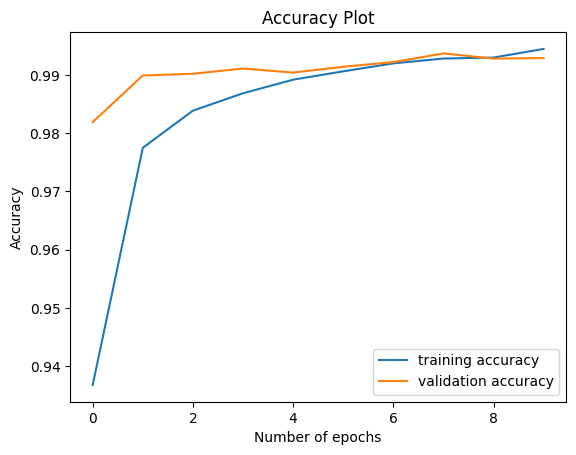

In [12]:
plt.plot(history.history["accuracy"], label = "training accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.show()

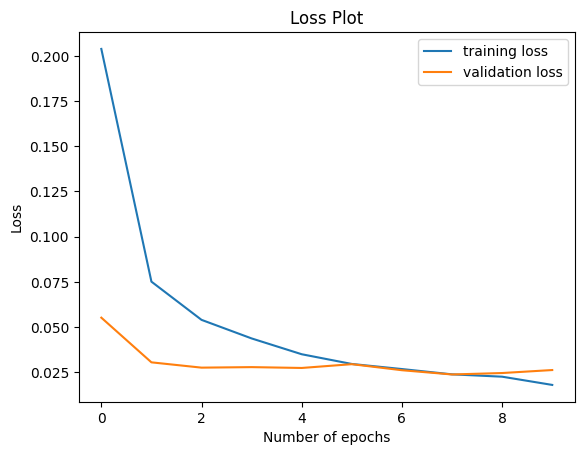

In [13]:
plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend()
plt.show()

Result- Trained Convolutional Neural Network performs very well on MNIST dataset.